In [2]:
import kernel
import numpy as np
import seaborn as sns
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

<Axes: >

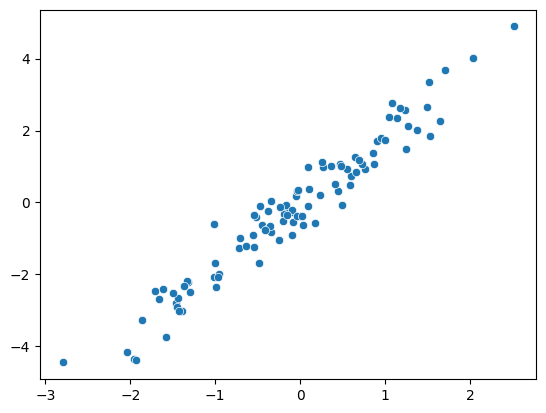

In [3]:
sns.scatterplot(x=x, y=y)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

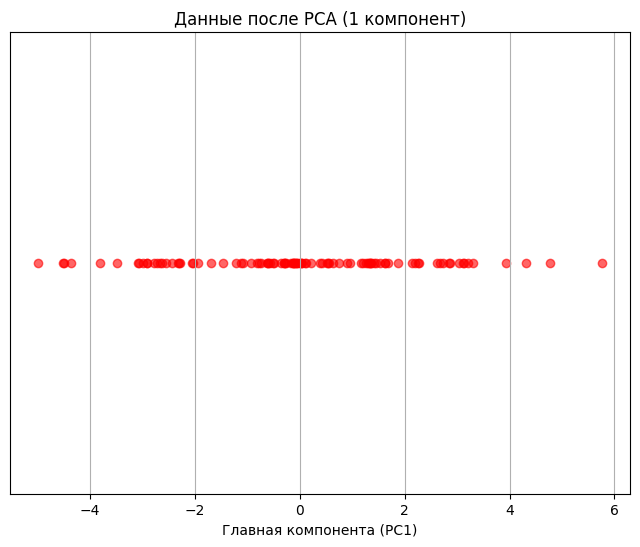

In [6]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca, np.zeros_like(X_pca), color='red', alpha=0.6)  # Отложение по оси X, Y = 0
plt.title('Данные после PCA (1 компонент)')
plt.xlabel('Главная компонента (PC1)')
plt.yticks([])  # Убираем метки по оси Y
plt.grid()
plt.show()

In [7]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.46576139 0.88491035]]
Объясненная дисперсия: [0.99012915]


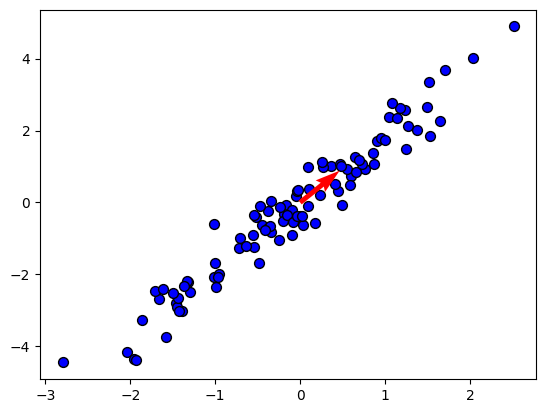

In [8]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

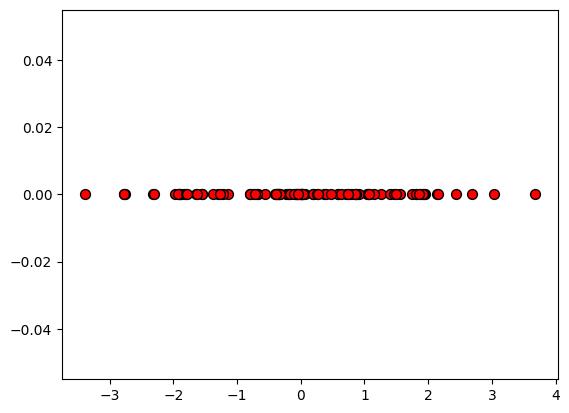

In [10]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

In [11]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

In [13]:
import pandas as pd

df_temp = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

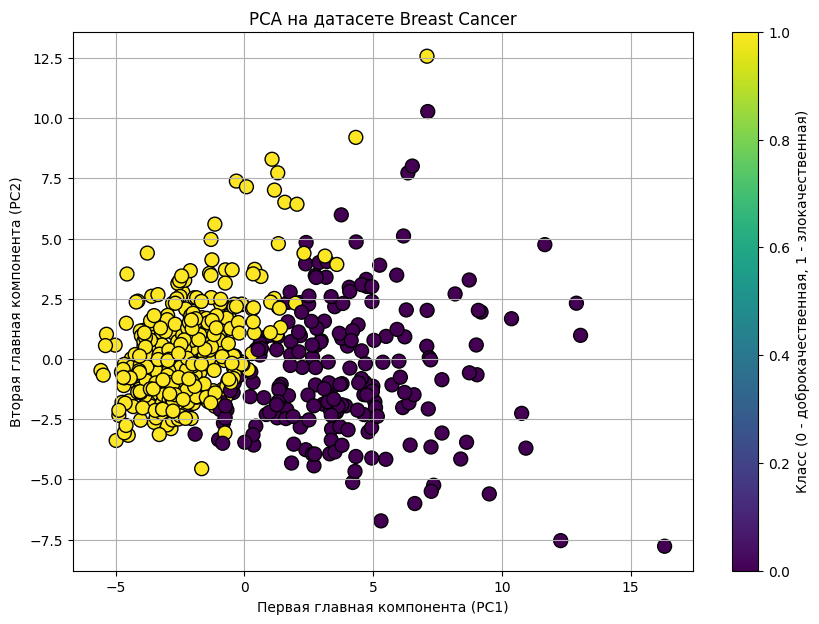

In [14]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_temp['PC1'], df_temp['PC2'], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA на датасете Breast Cancer')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(scatter, label='Класс (0 - доброкачественная, 1 - злокачественная)')
plt.grid()
plt.show()

In [15]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [16]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


In [17]:
n_components_range = range(1, 31)
explained_variance = []

In [18]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

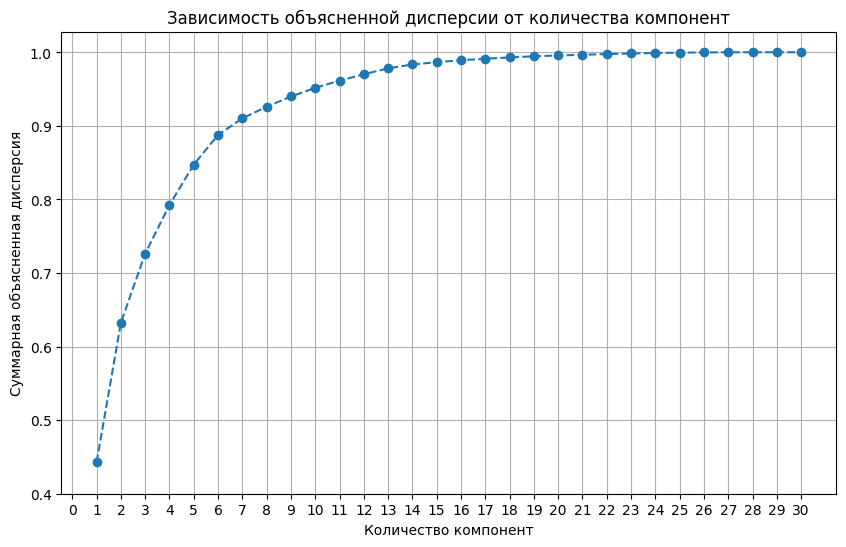

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance, marker='o', linestyle='--')
plt.title('Зависимость объясненной дисперсии от количества компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объясненная дисперсия')
plt.grid()
plt.xticks(np.arange(0, 31, 1))  # Подписи по оси X
plt.yticks(np.arange(0.4, 1.1, 0.1))  # Подписи по оси Y
plt.show()

In [20]:
pca = PCA(n_components=7)  # Уменьшаем до 7 компонент
X_pca = pca.fit_transform(X_scaled)

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объясненная дисперсия: 0.91


In [21]:
df_temp_1 = pd.DataFrame(data=X_pca)

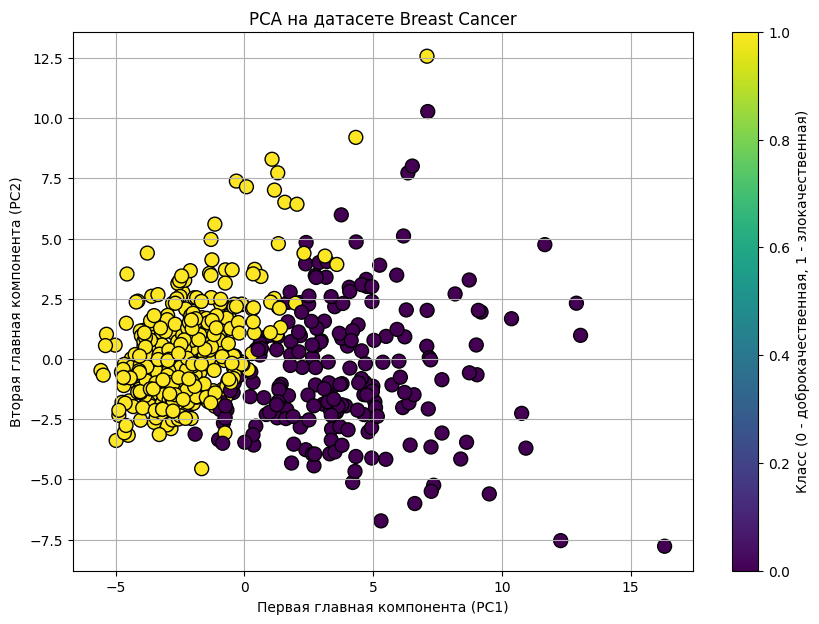

In [22]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_temp_1[0], df_temp_1[1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA на датасете Breast Cancer')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.colorbar(scatter, label='Класс (0 - доброкачественная, 1 - злокачественная)')
plt.grid()
plt.show()

In [23]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

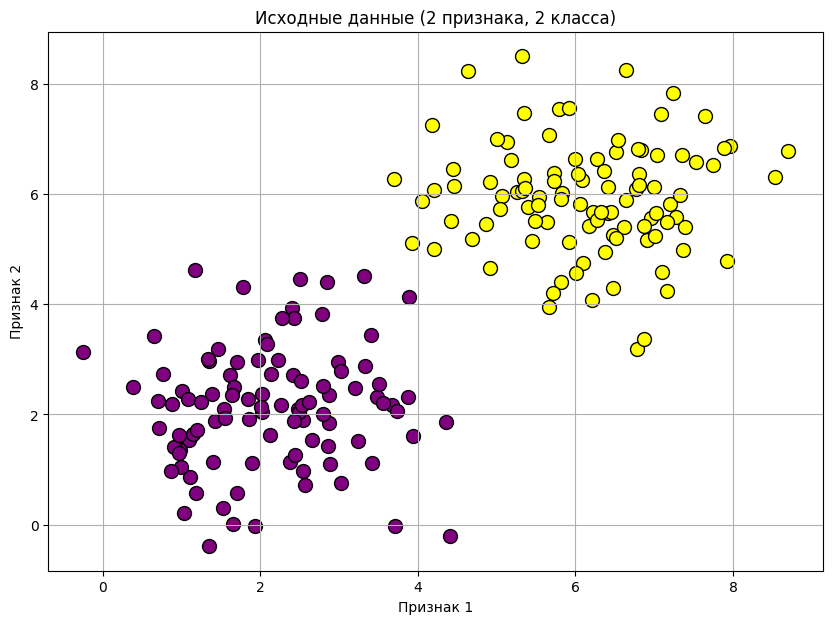

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', edgecolor='k', s=100)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Исходные данные (2 признака, 2 класса)')
plt.grid(True)
plt.show()

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

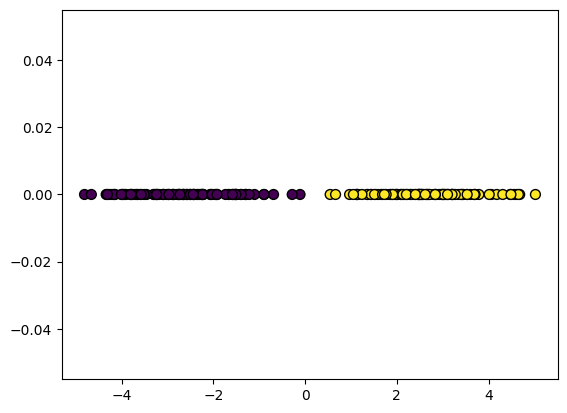

In [26]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

In [27]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[8.53396979 7.34150496]]


In [29]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation) 

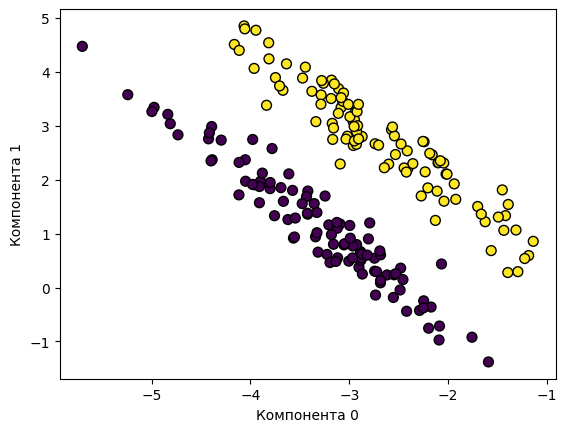

In [31]:
plt.scatter(
    X[:, 0],                       # по оси X первая колонка
    X[:, 1],                       # по оси Y вторая колонка
    c=y, edgecolor='k', s=50, cmap='viridis'
)
plt.xlabel("Компонента 0")
plt.ylabel("Компонента 1")
plt.show()

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

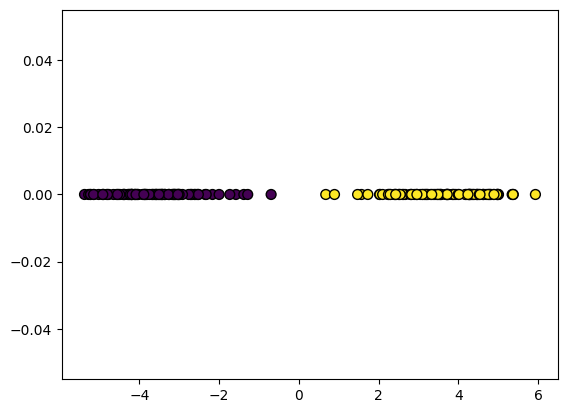

In [33]:
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, edgecolor='k', s=50)

In [34]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[24.59931105 28.80353457]]


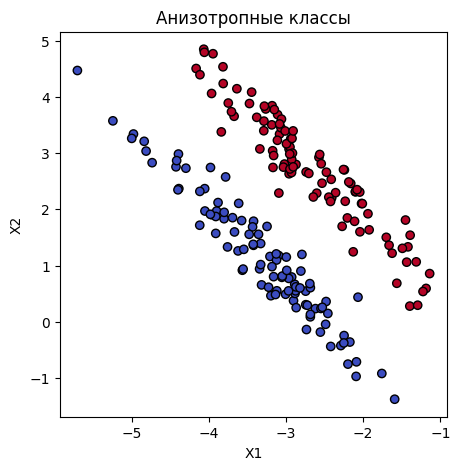

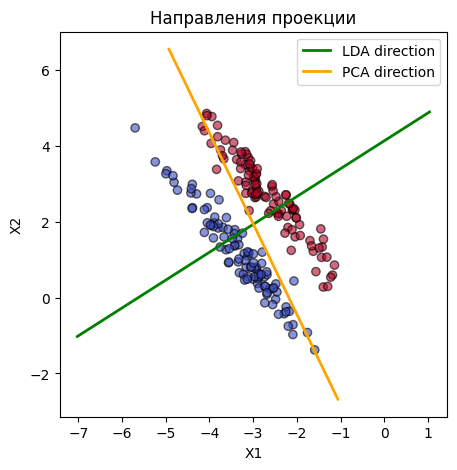

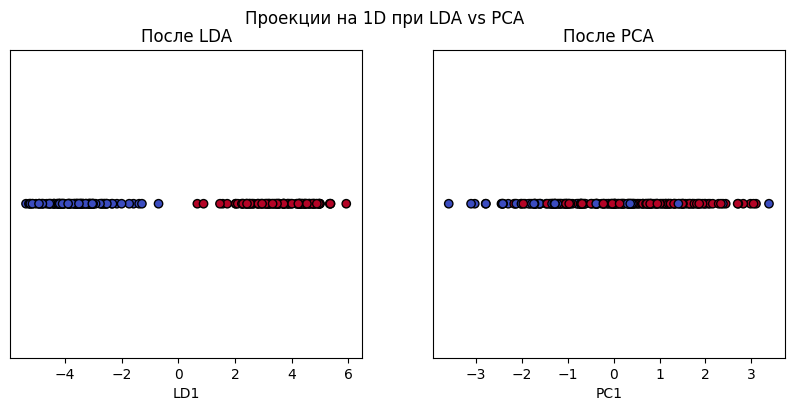

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = np.array([[0.6, -0.6], [-0.4, 0.8]])
X = X.dot(transformation)

# 2. Исходный разброс
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Анизотропные классы")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

# 3. Обучаем LDA и PCA (1 компоненту)
lda = LinearDiscriminantAnalysis(n_components=1).fit(X, y)
pca = PCA(n_components=1).fit(X)

# 4. Направления проекции
v_lda = lda.coef_[0]            # вектор нормали к границе
v_lda = v_lda / np.linalg.norm(v_lda)
v_pca = pca.components_[0]     # первый компонент PCA
v_pca = v_pca / np.linalg.norm(v_pca)

# Функция для рисования линии направления
def plot_line(vec, color, label):
    origin = np.mean(X, axis=0)
    line = np.vstack([origin - vec*5, origin + vec*5])
    plt.plot(line[:,0], line[:,1], color=color, linewidth=2, label=label)

# 5. Визуализация направлений на общем графике
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.6)
plot_line(v_lda,  'green', 'LDA direction')
plot_line(v_pca,  'orange','PCA direction')
plt.legend()
plt.title("Направления проекции")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

# 6. Проекция и новый разброс в 1D
X_lda = lda.transform(X)[:,0]
X_pca = pca.transform(X)[:,0]

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
axes[0].scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='coolwarm', edgecolor='k')
axes[0].set_title("После LDA"); axes[0].set_xlabel("LD1")
axes[1].scatter(X_pca, np.zeros_like(X_pca), c=y, cmap='coolwarm', edgecolor='k')
axes[1].set_title("После PCA"); axes[1].set_xlabel("PC1")
for ax in axes:
    ax.set_yticks([])
plt.suptitle("Проекции на 1D при LDA vs PCA")
plt.show()

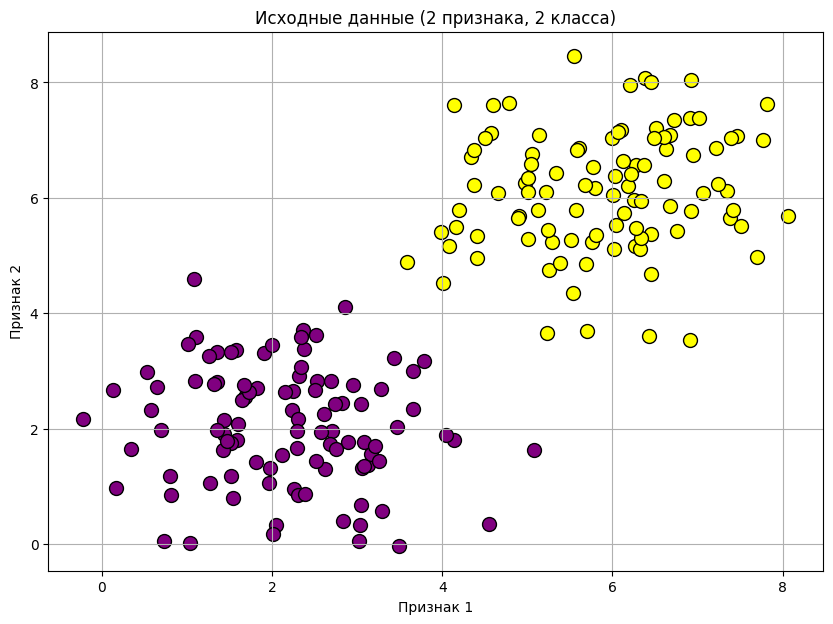

In [37]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
plt.figure(figsize=(10, 7))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow', edgecolor='k', s=100)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Исходные данные (2 признака, 2 класса)')
plt.grid(True)
plt.show()

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

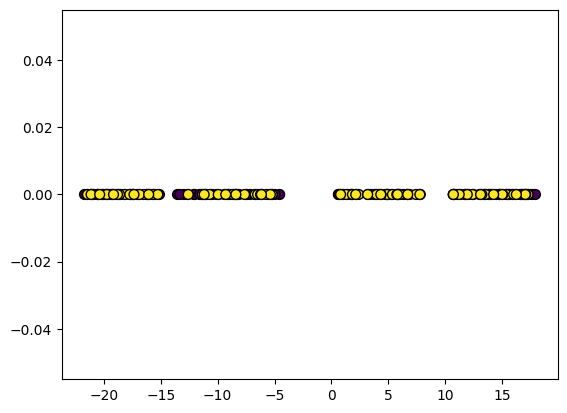

In [41]:
plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, edgecolor='k', s=50)

In [42]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

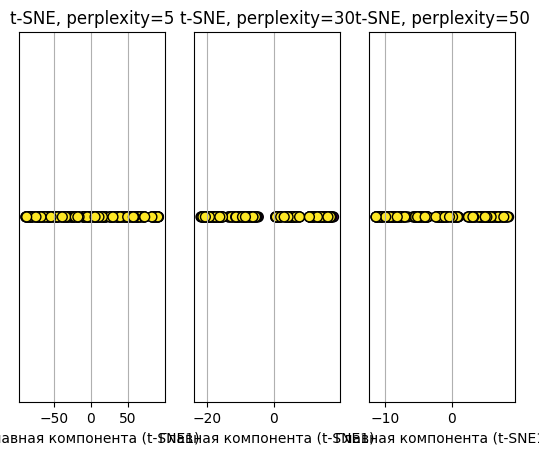

In [43]:
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

In [45]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

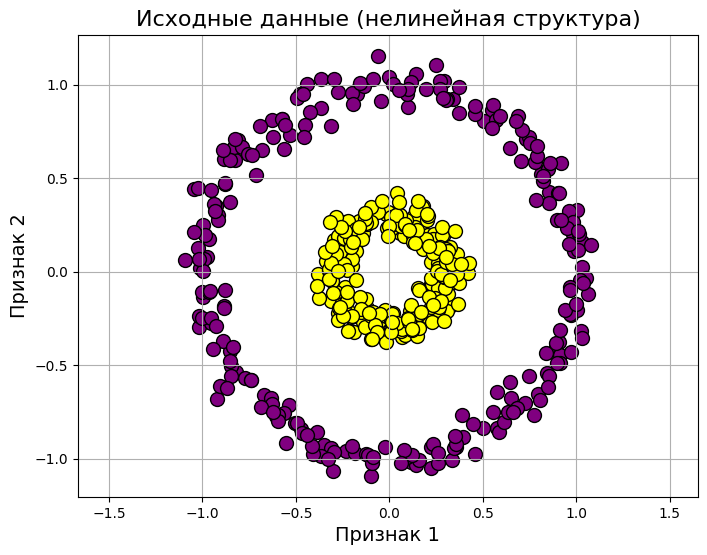

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='purple', edgecolor='k', s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='yellow', edgecolor='k', s=100)
plt.title('Исходные данные (нелинейная структура)', fontsize=16)
plt.xlabel('Признак 1', fontsize=14)
plt.ylabel('Признак 2', fontsize=14)
plt.axis('equal')
plt.grid()
plt.show()

In [48]:
kernels = ['linear', 'poly', 'rbf']

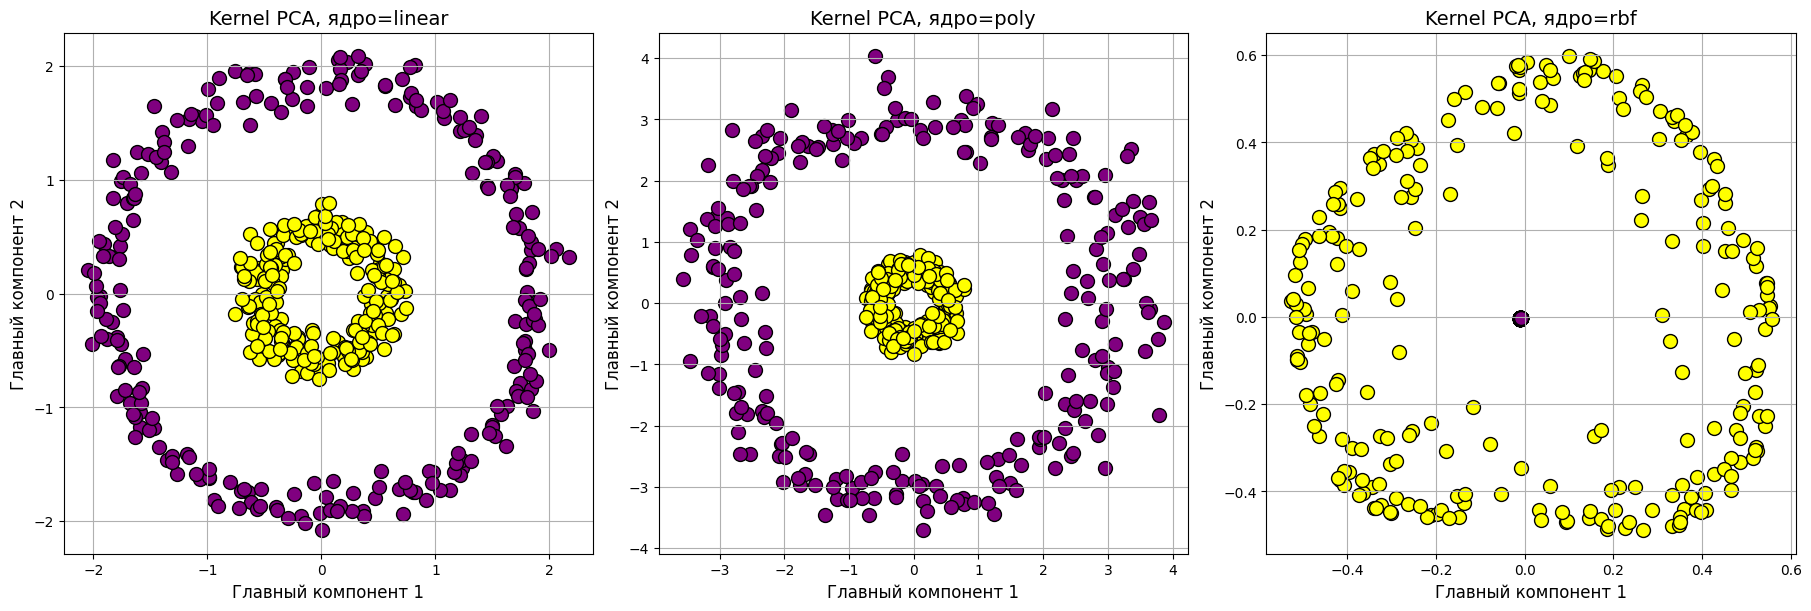

In [51]:
from sklearn.decomposition import KernelPCA

fig, axes = plt.subplots(1, len(kernels), figsize=(18, 6), constrained_layout=True)

for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)
    
    ax = axes[i]
    ax.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='purple', edgecolor='k', s=100)
    ax.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='yellow', edgecolor='k', s=100)
    ax.set_title(f'Kernel PCA, ядро={kernel}', fontsize=14)
    ax.set_xlabel('Главный компонент 1', fontsize=12)
    ax.set_ylabel('Главный компонент 2', fontsize=12)
    ax.grid()

plt.show()

In [52]:
gamma_values = [0.1, 1, 10]

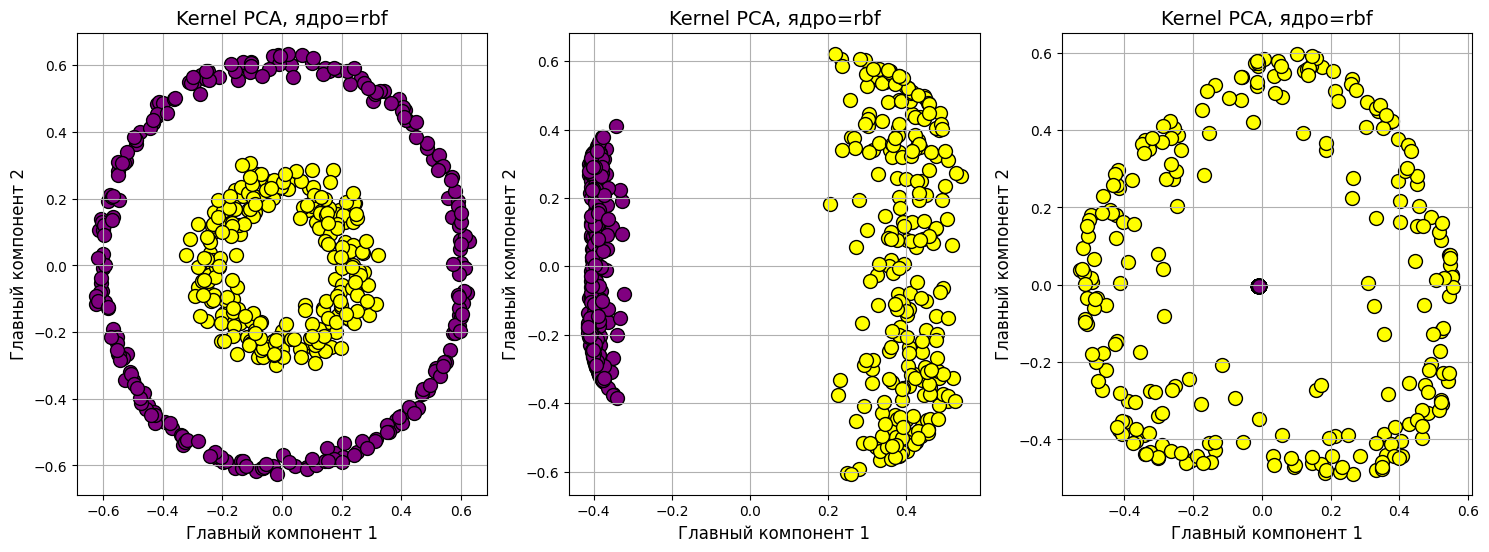

In [53]:
fig, axes = plt.subplots(1, len(gamma_values), figsize=(18, 6))

for i, gamma_values in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma_values)
    X_kpca = kpca.fit_transform(X_scaled)
    
    ax = axes[i]
    ax.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='purple', edgecolor='k', s=100)
    ax.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='yellow', edgecolor='k', s=100)
    ax.set_title(f'Kernel PCA, ядро={kernel}', fontsize=14)
    ax.set_xlabel('Главный компонент 1', fontsize=12)
    ax.set_ylabel('Главный компонент 2', fontsize=12)
    ax.grid()

plt.show()

In [ ]:
# Сводка по лабе

# Сегодня на лабораторной работе мы изучали три метода для уменьшения размерности данных. Эти методы помогают упростить данные, делая их легче для анализа и визуализации, при этом стараясь сохранить как можно больше важной информации.
# 
# PCA (Метод главных компонент):
# 
# Смысл: PCA помогает уменьшить количество признаков в данных, находя новые оси (компоненты), которые объясняют наибольшее количество вариации в данных. Это позволяет визуализировать данные в 2D или 3D, даже если исходно у нас много признаков. Метод ищет такие компоненты, которые лучше всего отражают структуру данных, минимизируя потери информации.
# 
# LDA (Линейный дискриминантный анализ):
# 
# Смысл: LDA похож на PCA, но с одной ключевой разницей — он учитывает, как данные разделяются по классам. LDA находит такие компоненты, которые лучше всего разделяют разные классы в данных. Это полезно, когда мы хотим улучшить классификацию данных, например, для машинного обучения.
# 
# t-SNE (t-распределённый стохастический метод соседей):
# 
# Смысл: t-SNE используется для более сложных данных, которые сложно представить в двух или трёх измерениях. Этот метод сохраняет структуру данных и их локальные отношения, и идеально подходит для визуализации данных, где классы или группы могут быть нелинейно разделены. t-SNE помогает увидеть скрытые паттерны в данных, которые не видны при использовании других методов.
# 
# Таким образом, все эти методы помогают нам работать с большими и сложными наборами данных, делая их проще для анализа и визуализации, при этом сохраняя важную информацию для дальнейшей работы, такой как классификация или прогнозирование

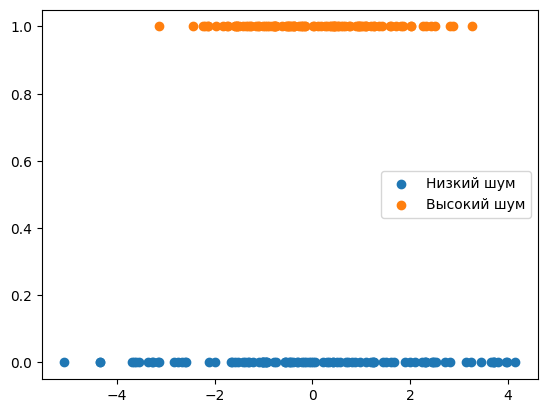

In [55]:
# 1.Попробуйте изменить уровень шума в данных (например, увеличить или уменьшить шум в y) и посмотрите, как это влияет на результат PCA.
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)
y_high_noise = 0.5 * x + 0.5 * x + np.random.normal(0, 0.5, 100)  # Увеличиваем шум
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_pca_noise = pca.fit_transform(np.column_stack((x, y)))
X_pca_high_noise = pca.fit_transform(np.column_stack((x, y_high_noise)))
plt.scatter(X_pca_noise, np.zeros_like(X_pca_noise), label="Низкий шум")
plt.scatter(X_pca_high_noise, np.ones_like(X_pca_high_noise), label="Высокий шум")
plt.legend()
plt.show()
# Чем больше шума, тем хуже PCA выделяет главные компоненты.

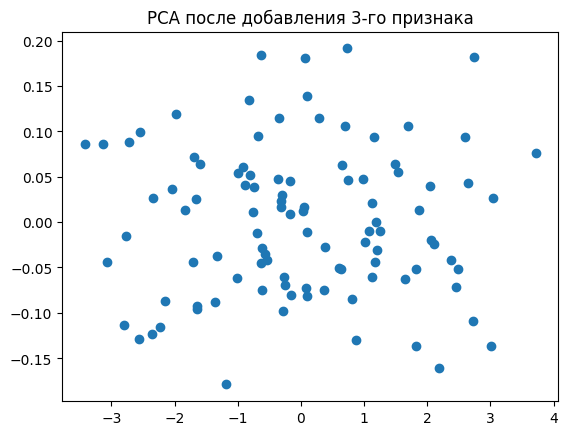

In [56]:
# 2. Добавьте третий признак, который также коррелирует с первыми двумя, и примените PCA с n_components=2.
x = np.column_stack((x, x)) if x.ndim == 1 else x

x_new = np.column_stack((x, 0.3 * x[:, 0] + 0.7 * x[:, 1] + np.random.normal(0, 0.1, x.shape[0])))
pca = PCA(n_components=2)
x_pca_new = pca.fit_transform(x_new)
plt.scatter(x_pca_new[:, 0], x_pca_new[:, 1])
plt.title("PCA после добавления 3-го признака")
plt.show()
# PCA сохраняет структуру данных, даже если добавляется коррелированный признак.

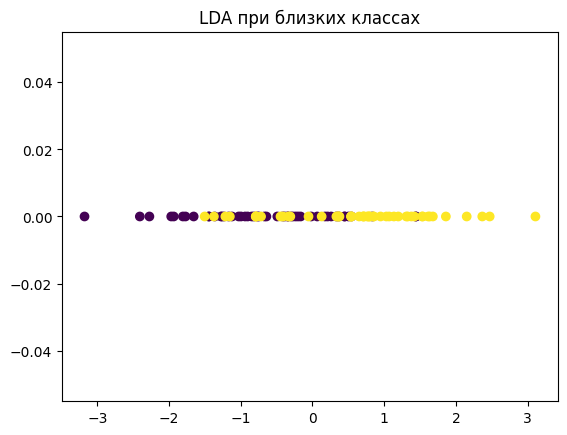

In [57]:
# 3. Попробуйте изменить расположение классов (например, сделать их ближе друг к другу) и посмотрите, как это влияет на результат LDA.
X1 = np.random.normal(0, 1, (50, 2))
X2 = np.random.normal(1, 1, (50, 2))  # Было normal(3, 1, ...)
X = np.vstack((X1, X2))
y = np.array([0] * 50 + [1] * 50)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y)
plt.title("LDA при близких классах")
plt.show()
# Видим плохое разделение

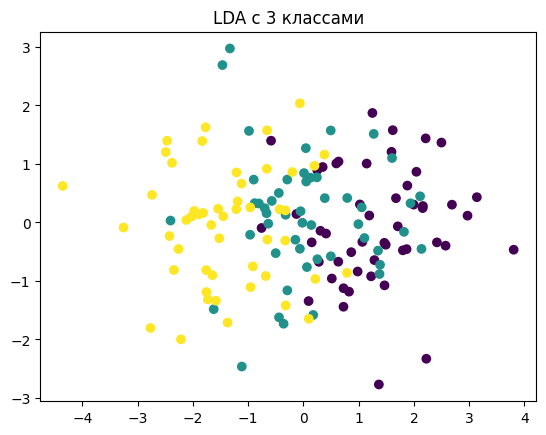

In [58]:
# 4.Добавьте третий класс и примените LDA с n_components=2.
X3 = np.random.normal(2, 1, (50, 2))
X = np.vstack((X1, X2, X3))
y = np.array([0] * 50 + [1] * 50 + [2] * 50)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.title("LDA с 3 классами")
plt.show()

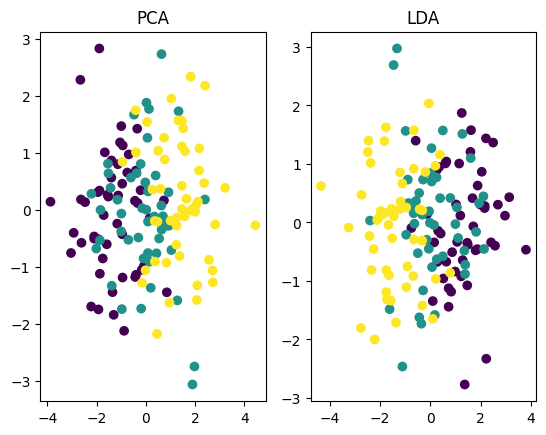

In [59]:
# 5. Сравните LDA с PCA на этих же данных. Какой метод лучше разделяет классы?
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title("PCA")
ax2.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
ax2.set_title("LDA")
plt.show()
# LDA справляется лучше, поскольку учитывает метки

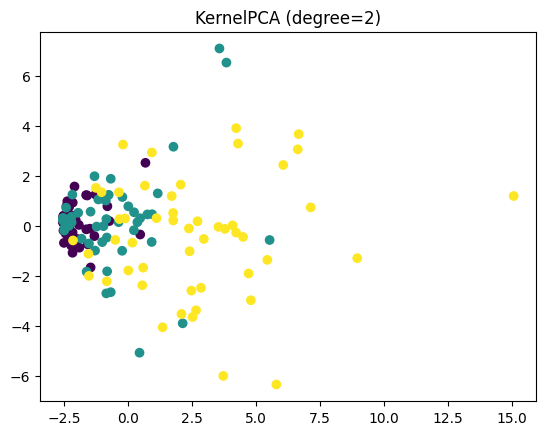

In [66]:
# 6.Попробуйте изменить параметр degree для полиномиального ядра метода KernelPCA и посмотрите, как это влияет на результат.
kpca_linear = KernelPCA(n_components=2, kernel='poly', degree=2)
X_kpca = kpca_linear.fit_transform(X)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title("KernelPCA (degree=2)")
plt.show()
# У нас никаких изменений нет, поскольку последние данные линейные. Однако если возьмем нелинейные то:

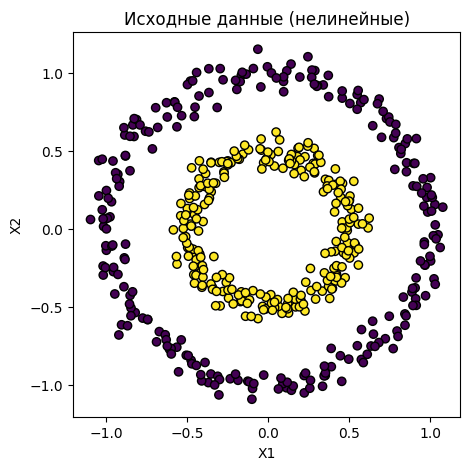

In [71]:
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Исходные данные (нелинейные)")
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()


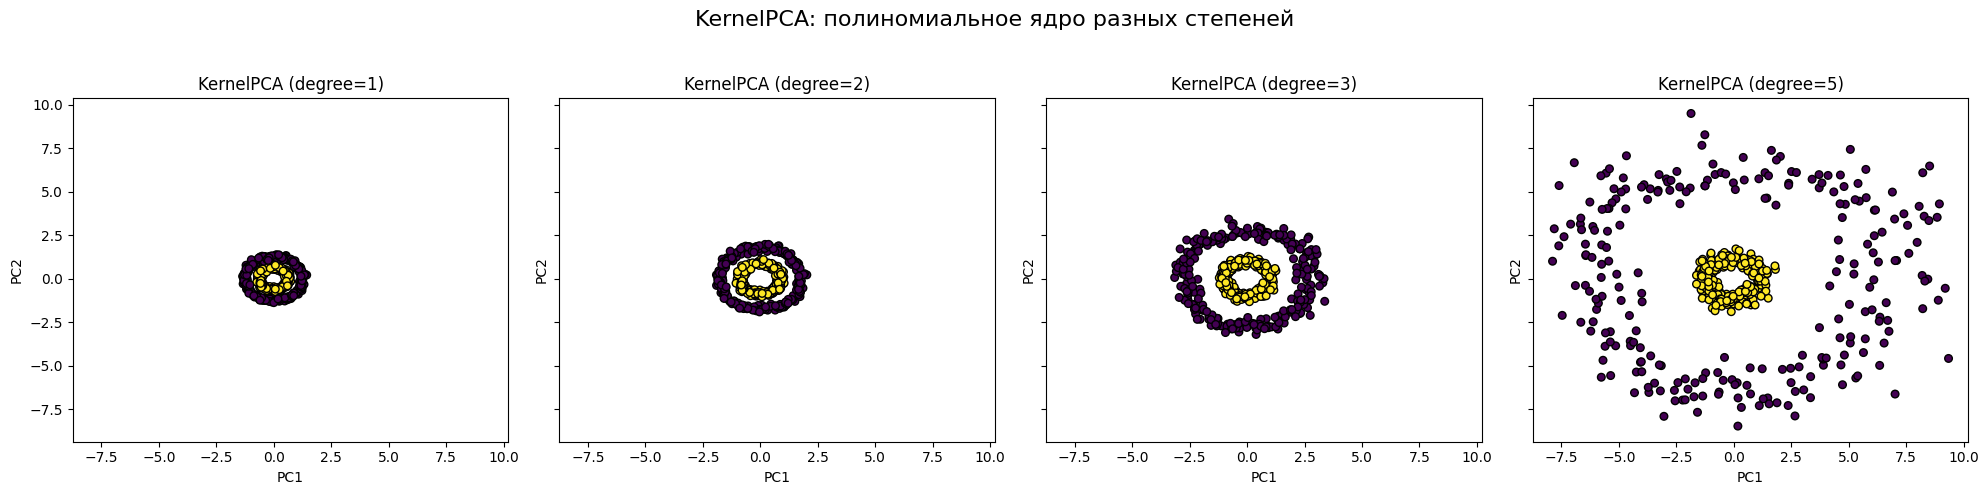

In [72]:
# Стандартизация
X_scaled = StandardScaler().fit_transform(X)

# Степени полинома для KernelPCA
degrees = [1, 2, 3, 5]
projections = {}

for deg in degrees:
    kpca = KernelPCA(n_components=2, kernel='poly', degree=deg)
    projections[deg] = kpca.fit_transform(X_scaled)

# Рисуем 4 графика
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

for ax, deg in zip(axes, degrees):
    X_kpca = projections[deg]
    ax.scatter(
        X_kpca[:, 0], X_kpca[:, 1],
        c=y, cmap='viridis', edgecolor='k', s=30
    )
    ax.set_title(f"KernelPCA (degree={deg})")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.suptitle("KernelPCA: полиномиальное ядро разных степеней", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()